In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
%matplotlib inline

# Raw data file
file_to_load = "hw1.csv"

# Read purchasing file and store into pandas data frame
pd_data = pd.read_csv(file_to_load)
pd_data = pd_data[:10000]
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


第一題

In [2]:
userid = list(set(pd_data["UserId"]))

In [3]:
player = []
score = []
for i in userid:
    idgroup = pd_data[pd_data["UserId"].isin([i])]
    idprofile = list(set(idgroup['ProfileName']))[0]
    scoreavg = idgroup['Score'].mean()
    scorelen = len(pd_data[pd_data["UserId"].isin([i])])
    player.append((i,idprofile,scorelen,scoreavg,))
    score.append((scorelen))
    
    
player.sort(key = lambda p: p[2],reverse = True)
print(player[:10])

[('A1Z54EM24Y40LL', 'c2', 17, 3.8823529411764706), ('A2SZLNSI5KOQJT', 'Carrie, "Formerly &#34;Sister Carrie&#34;"', 10, 3.8), ('A35R32TA60XD57', 'M. Torma', 9, 4.111111111111111), ('A281NPSIMI1C2R', 'Rebecca of Amazon "The Rebecca Review"', 8, 5.0), ('A3PJZ8TU8FDQ1K', 'Jared Castle', 7, 4.714285714285714), ('A3NHUQ33CFH3VM', 'Citizen John', 7, 3.142857142857143), ('A3OXHLG6DIBRW8', 'C. F. Hill "CFH"', 7, 4.428571428571429), ('A2R6RA8FRBS608', 'Matthew G. Sherwin', 6, 5.0), ('ABQN42N7ICNZQ', 'T.O. Perspective', 6, 4.333333333333333), ('AY12DBB0U420B', 'Gary Peterson', 6, 4.5)]


In [4]:
ans1 = pd.DataFrame(player, columns=['UserId', 'ProfileName', 'Score count', 'Score mean'])
ans1.head(10)

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
7,A2R6RA8FRBS608,Matthew G. Sherwin,6,5.000000
8,ABQN42N7ICNZQ,T.O. Perspective,6,4.333333
9,AY12DBB0U420B,Gary Peterson,6,4.500000


第二題

In [5]:
mostuser = pd_data[pd_data["UserId"].isin(['A1Z54EM24Y40LL'])]
mostuser

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
143,144,B001GVISJW,A1Z54EM24Y40LL,c2,0,0,5,1269129600,Great for the kids!,If you are looking for a less messy version of...
3587,3588,B004X8TK9W,A1Z54EM24Y40LL,c2,1,1,5,1338249600,AWESOME!,I may be dating myself here a bit but I rememb...
4993,4994,B000FA398U,A1Z54EM24Y40LL,c2,3,3,5,1203206400,Best for oyster soup!,Try these first for all your seafood soups and...
6371,6372,B000084EKO,A1Z54EM24Y40LL,c2,0,0,3,1090800000,Not any different than regular Friskies,I honestly cannot say that I saw any differenc...
6372,6373,B000084EKA,A1Z54EM24Y40LL,c2,0,0,4,1090972800,Not their best...,I think 9 Lives does a better job on this vari...
6373,6374,B000084EKB,A1Z54EM24Y40LL,c2,0,0,4,1091059200,Great food!,This version is ground. NOt my current cat's ...
6374,6375,B000084EKC,A1Z54EM24Y40LL,c2,1,1,5,1090972800,Great food for all cats!,"According to my cat, this stuff is just great...."
6375,6376,B000084EKD,A1Z54EM24Y40LL,c2,1,1,2,1090972800,Needs improved,I haven't had a cat yet that liked this one. ...
6380,6381,B000084EKG,A1Z54EM24Y40LL,c2,2,2,5,1090972800,Awesome food!,This is my cat's favorite one. He just licks ...
6382,6383,B000084EK8,A1Z54EM24Y40LL,c2,2,2,3,1090972800,Not the favorite in our house,Once or twice a year for a little variety and ...


<BarContainer object of 5 artists>

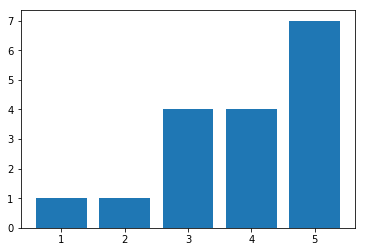

In [6]:
mostscore = list(set(mostuser["Score"]))
mostlen = []
for i in mostscore:
    mostlens = len(mostuser[mostuser["Score"].isin([i])])
    mostlen.append((mostlens))
plt.bar(mostscore,mostlen)

第三題

In [60]:
timelist = list((pd_data["Time"]))
realtimelist = []
for t in timelist:
    timeArray = time.localtime(t)
    realtime = time.strftime("%Y", timeArray)
    realtimelist.append((realtime))

In [71]:
timecount = pd.value_counts(realtimelist)
timecountlist = list(timecount)
timecountlist.sort(reverse= False)

<BarContainer object of 10 artists>

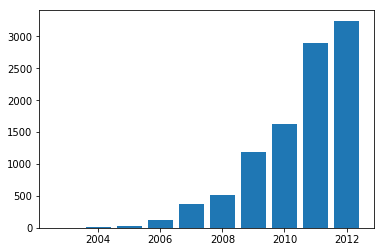

In [72]:
timeline = []
for a in range(2003,2013):
    timeline.append((a))
plt.bar(timeline,timecountlist)

第四題

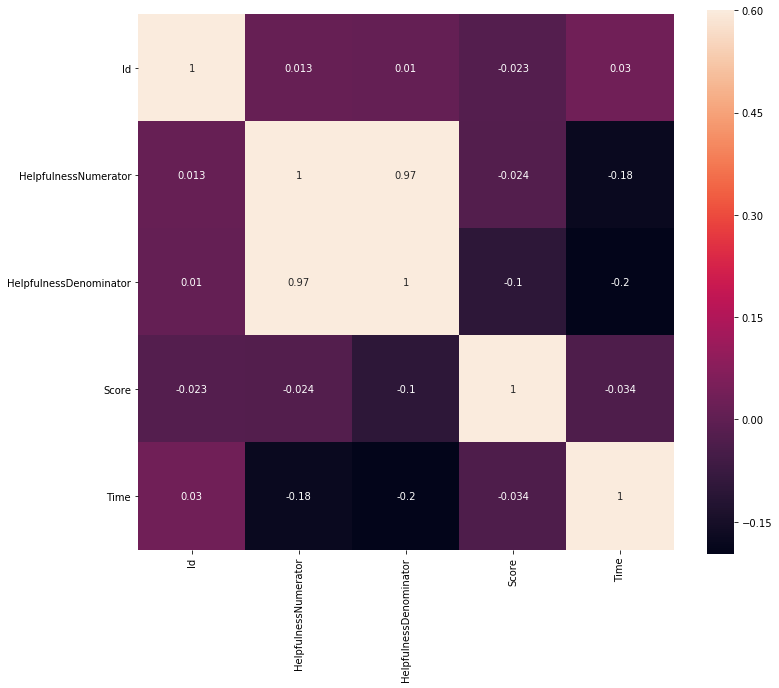

In [9]:
data3 = pd_data[["UserId","Id","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time"]]
plt.figure(figsize=(12,10))
sns.heatmap(data3.drop('UserId',axis=1).corr(), vmax=0.6, square=True, annot=True)

第五題